<a href="https://colab.research.google.com/github/aurimas13/CodeAcademy-AI-Course/blob/main/Notebooks_Finished/Pandas_Lecture_2_first_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Do you want to concatenate data?
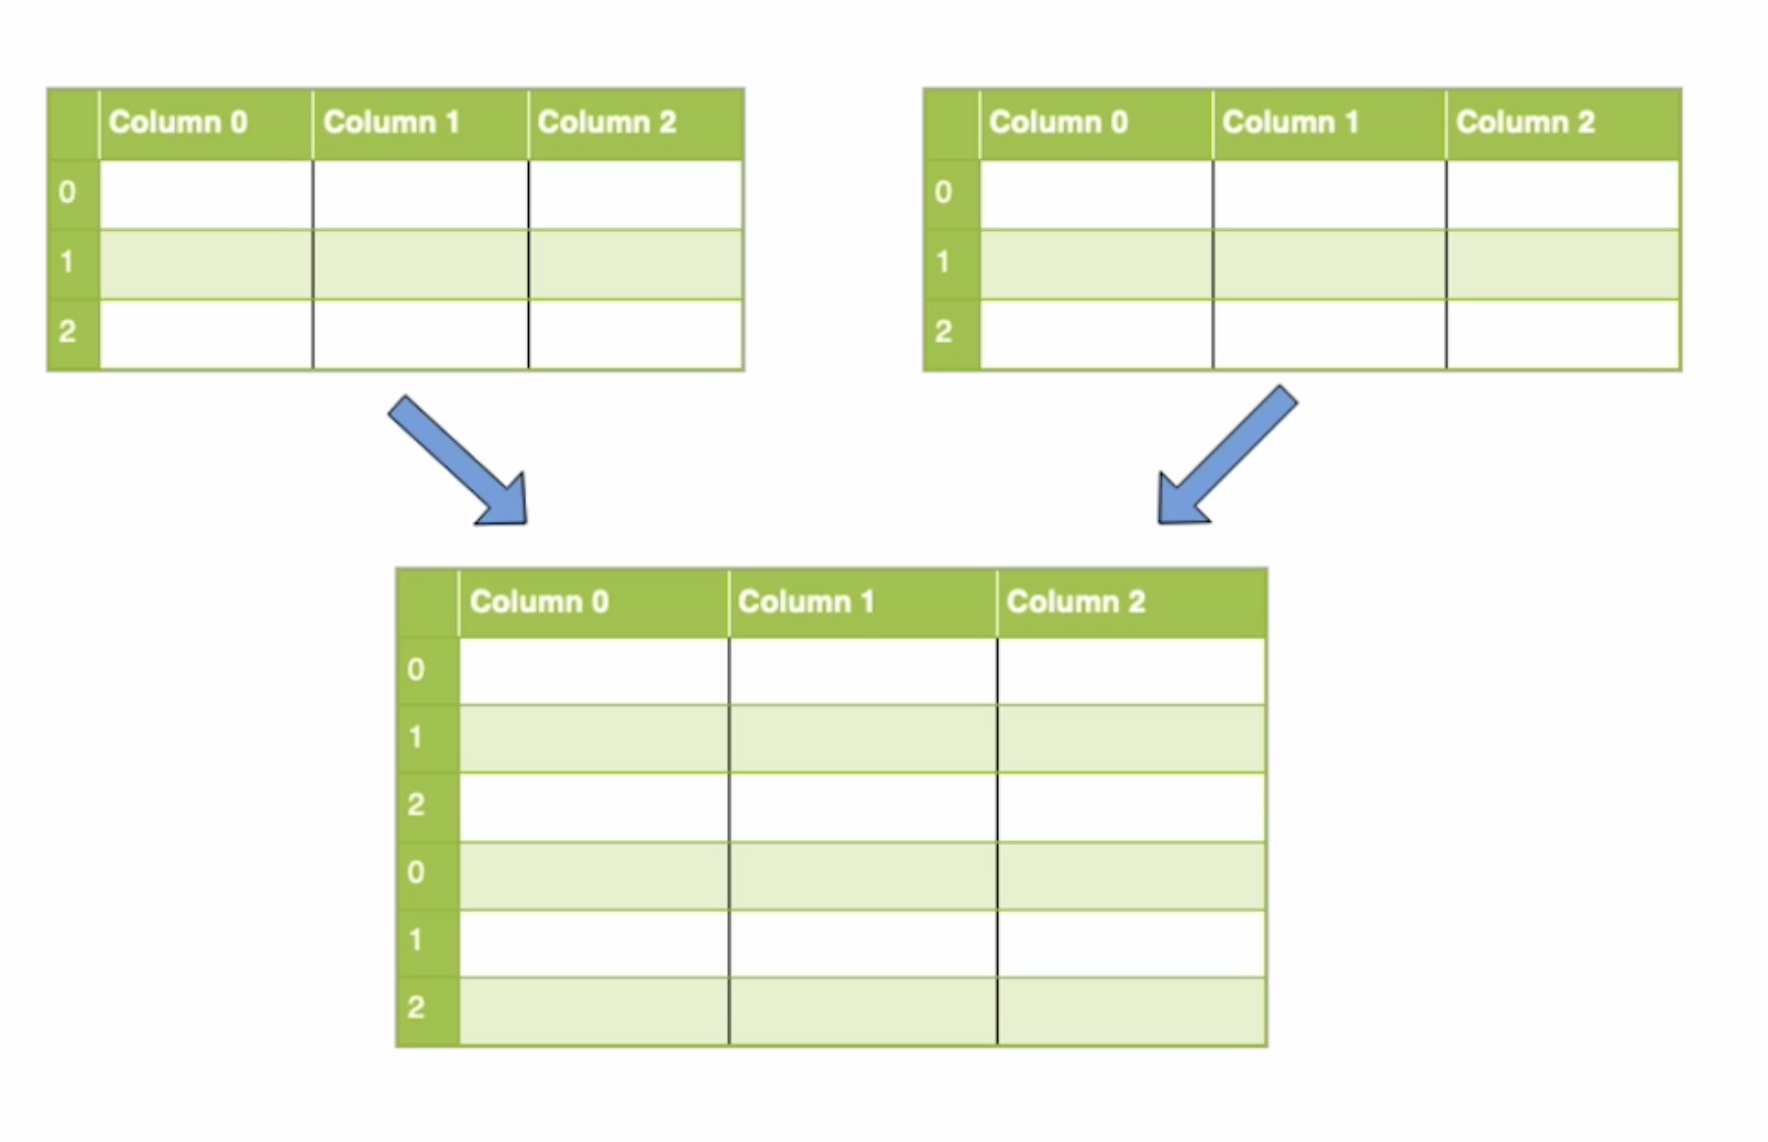

# Or do you want to use database join operations?
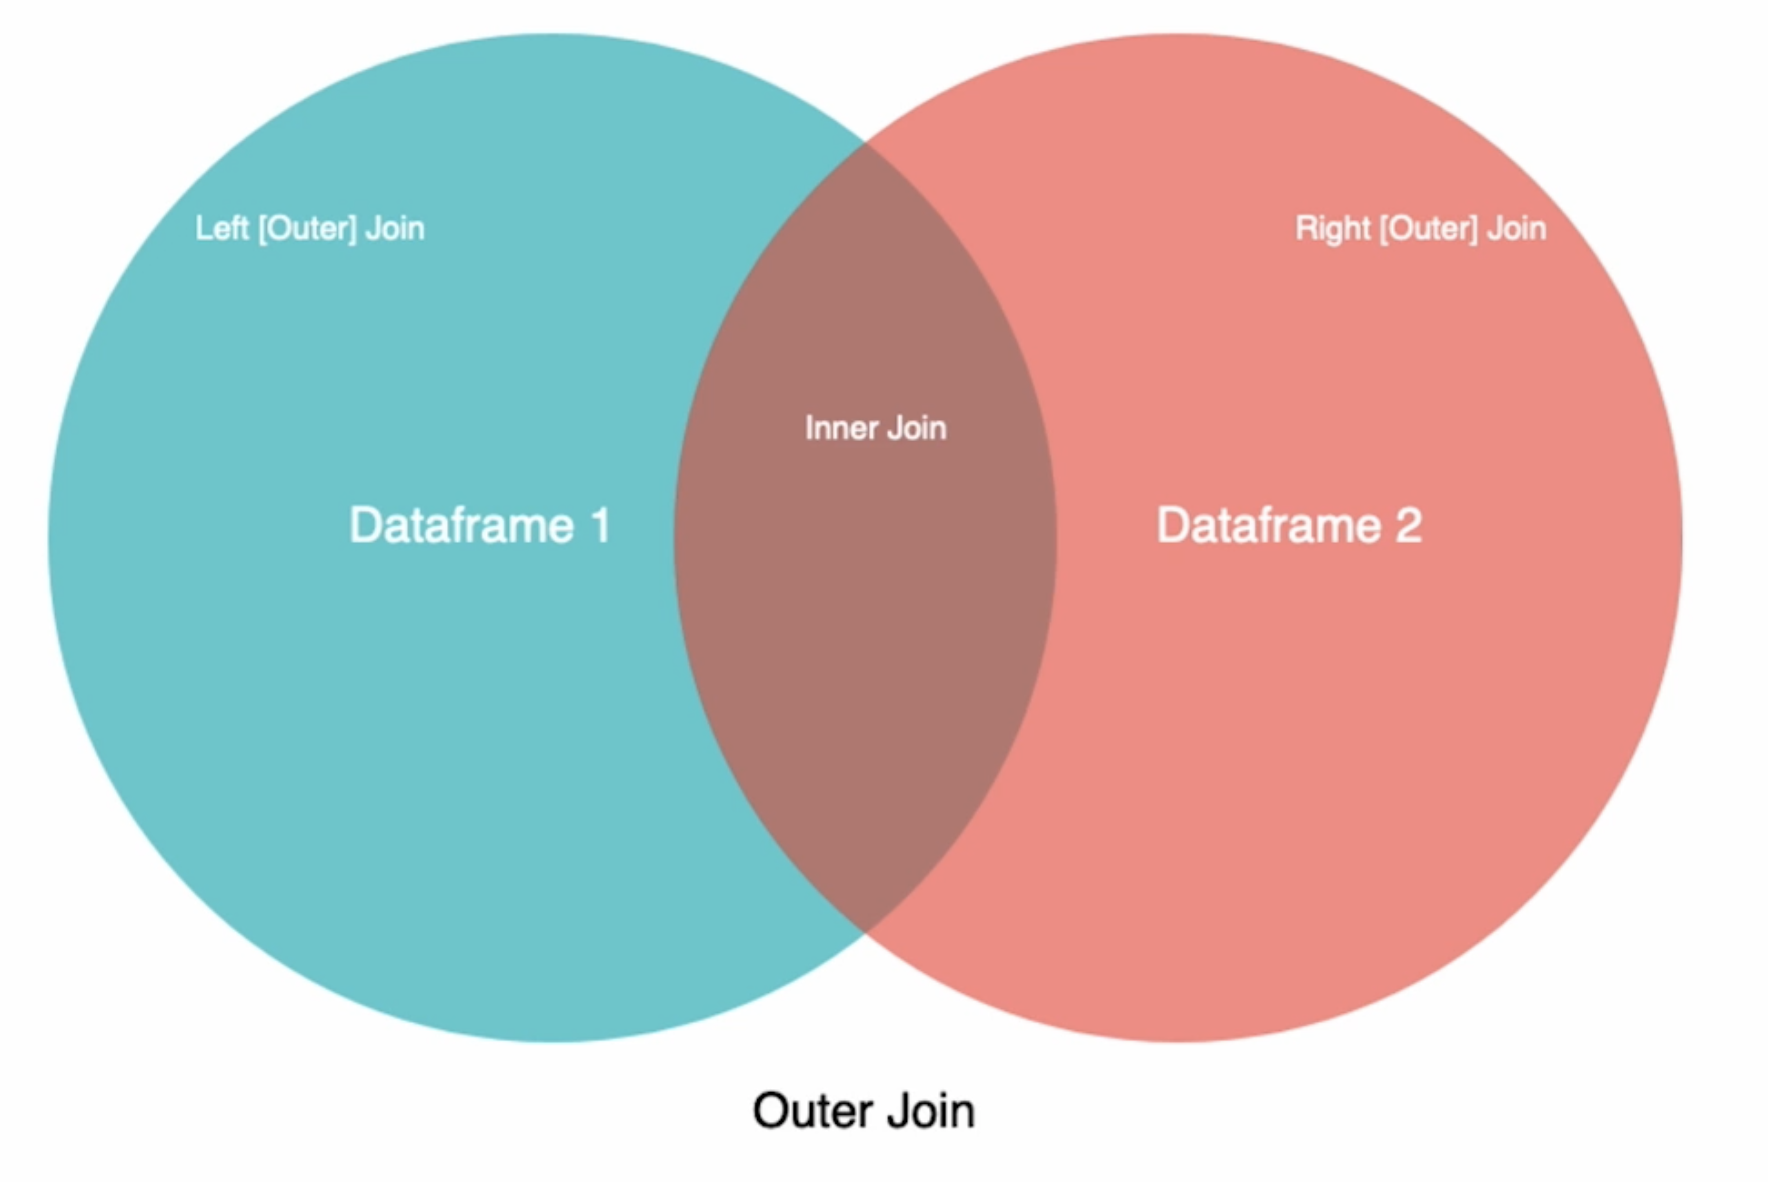


# What does it mean?
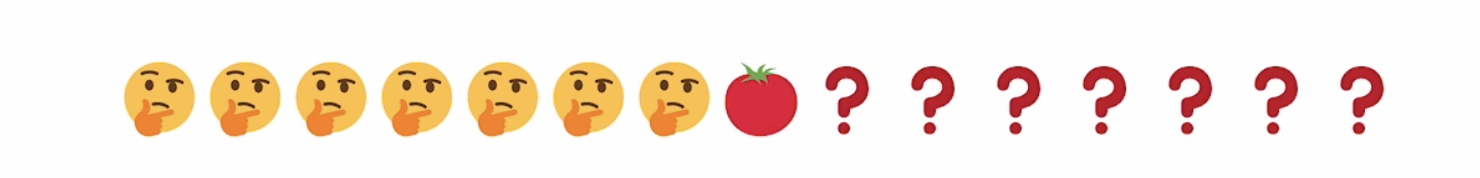

In [ ]:
couple_of_fruits = {'name': ['apple', 'pear', 'tomato', 'lemon'],
                    'image': ['🍏', '🍐', '🍅', '🍋']}

vegetables = {'name': ['tomato', 'potato', 'carrot'],
              'color':['red', 'brown', 'orange'],
              'image': ['🍅', '🥔', '🥕']}

fruits = pd.DataFrame(couple_of_fruits)
veggies = pd.DataFrame(vegetables)              

In [ ]:
fruits

name image
0   apple     🍏
1    pear     🍐
2  tomato     🍅
3   lemon     🍋

In [ ]:
veggies

name   color image
0  tomato     red     🍅
1  potato   brown     🥔
2  carrot  orange     🥕

# <b>Combining Data using concat()</b>

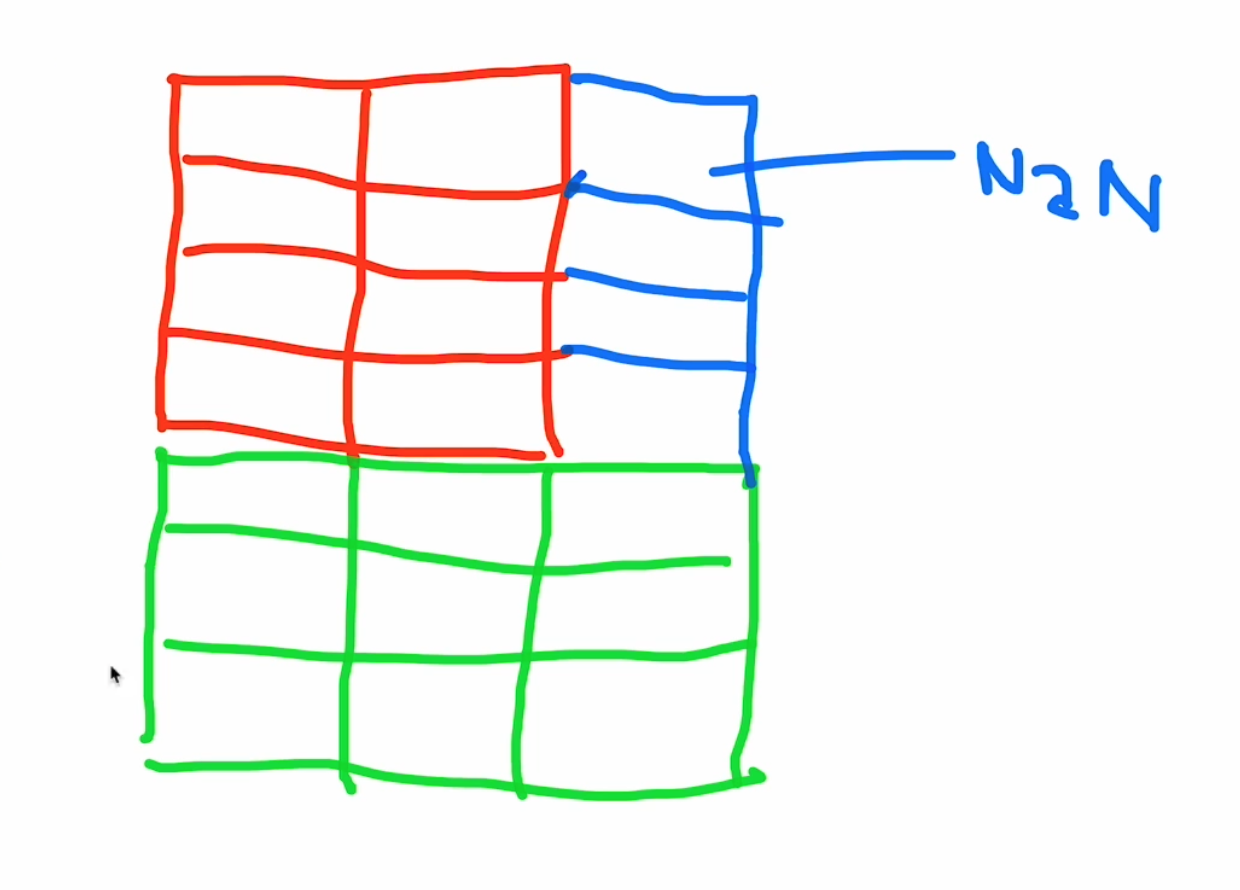

# <b>Concatenate Along the Row Axis</b>

In [ ]:
pd.concat([fruits, veggies])

name image   color
0   apple     🍏     NaN
1    pear     🍐     NaN
2  tomato     🍅     NaN
3   lemon     🍋     NaN
0  tomato     🍅     red
1  potato     🥔   brown
2  carrot     🥕  orange

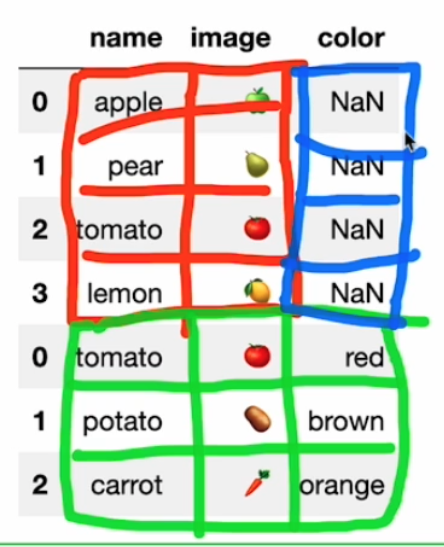

In [ ]:
# the order matters, what it will be if pass it differently?
pd.concat([veggies, fruits])

name   color image
0  tomato     red     🍅
1  potato   brown     🥔
2  carrot  orange     🥕
0   apple     NaN     🍏
1    pear     NaN     🍐
2  tomato     NaN     🍅
3   lemon     NaN     🍋

# <b>Concatenate Along the Column Axis</b>


In [ ]:
pd.concat?

Signature:
pd.concat(
    objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]',
    axis=0,
    join='outer',
    ignore_index: 'bool' = False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity: 'bool' = False,
    sort: 'bool' = False,
    copy: 'bool' = True,
) -> 'FrameOrSeriesUnion'
Docstring:
Concatenate pandas objects along a particular axis with optional set logic
along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis,
which may be useful if the labels are the same (or overlapping) on
the passed axis number.

Parameters
----------
objs : a sequence or mapping of Series or DataFrame objects
    If a mapping is passed, the sorted keys will be used as the `keys`
    argument, unless it is passed, in which case the values will be
    selected (see below). Any None objects will be dropped silently unless
    they are all None in which case a ValueError will be raised.
axis : {0/'index', 1/'columns'}, default 0
    The axis 

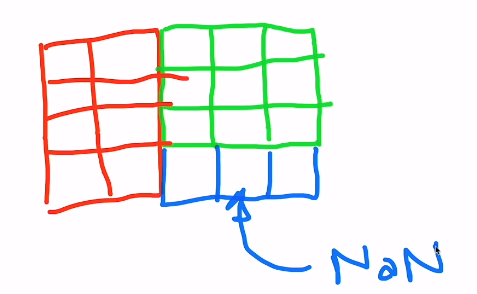

In [ ]:
pd.concat([fruits, veggies], axis='columns')

name image    name   color image
0   apple     🍏  tomato     red     🍅
1    pear     🍐  potato   brown     🥔
2  tomato     🍅  carrot  orange     🥕
3   lemon     🍋     NaN     NaN   NaN

In [ ]:
pd.concat([veggies, fruits], axis='columns')

name   color image    name image
0  tomato     red     🍅   apple     🍏
1  potato   brown     🥔    pear     🍐
2  carrot  orange     🥕  tomato     🍅
3     NaN     NaN   NaN   lemon     🍋

# <b>Mark Your DataFrames With Keys</b>

In [ ]:
pd.concat?

Signature:
pd.concat(
    objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]',
    axis=0,
    join='outer',
    ignore_index: 'bool' = False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity: 'bool' = False,
    sort: 'bool' = False,
    copy: 'bool' = True,
) -> 'FrameOrSeriesUnion'
Docstring:
Concatenate pandas objects along a particular axis with optional set logic
along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis,
which may be useful if the labels are the same (or overlapping) on
the passed axis number.

Parameters
----------
objs : a sequence or mapping of Series or DataFrame objects
    If a mapping is passed, the sorted keys will be used as the `keys`
    argument, unless it is passed, in which case the values will be
    selected (see below). Any None objects will be dropped silently unless
    they are all None in which case a ValueError will be raised.
axis : {0/'index', 1/'columns'}, default 0
    The axis 

In [ ]:
df = pd.concat([fruits, veggies], axis='rows', keys=['fruits', 'veggies'])

In [ ]:
pd.concat([fruits, veggies], axis='columns', keys=['fruits', 'veggies'])

fruits       veggies              
     name image    name   color image
0   apple     🍏  tomato     red     🍅
1    pear     🍐  potato   brown     🥔
2  tomato     🍅  carrot  orange     🥕
3   lemon     🍋     NaN     NaN   NaN

In [ ]:
df.name
df.loc['fruits'].name
df.loc['fruits']['image']

0    🍏
1    🍐
2    🍅
3    🍋
Name: image, dtype: object

In [ ]:
df.iloc[0]
df.loc['veggies'].iloc[1]

name     potato
image         🥔
color     brown
Name: 1, dtype: object

# <b>Access Data in a Multi-Index DataFrame</b>


In [ ]:
single = pd.concat([veggies, fruits])

In [ ]:
single

name   color image
0  tomato     red     🍅
1  potato   brown     🥔
2  carrot  orange     🥕
0   apple     NaN     🍏
1    pear     NaN     🍐
2  tomato     NaN     🍅
3   lemon     NaN     🍋

In [ ]:
#error
single.loc[0:2,:]

KeyError: 'Cannot get left slice bound for non-unique label: 0'

In [ ]:
multivitamin = pd.concat([fruits, veggies], keys=['fruits', 'veggies'])

In [ ]:
multivitamin

In [ ]:
multivitamin.loc[('fruits', 1):('veggies', 2), :]

In [ ]:
multivitamin.loc['fruits', 0]

In [ ]:
multivitamin.loc['veggies', 0]

# <b>Recreate a New Index After Concatenation</b>

In [ ]:
pd.concat?

In [ ]:
multivitamin = pd.concat([fruits, veggies], keys=['fruits', 'veggies'], ignore_index=False)
# multivitamin = pd.concat([fruits, veggies], ignore_index=False)
multivitamin

In [ ]:
multivitamin = pd.concat([fruits, veggies], keys=['fruits', 'veggies'], ignore_index=True)
multivitamin = pd.concat([fruits, veggies], ignore_index=True)

multivitamin

In [ ]:
multivitamin = pd.concat([fruits, veggies], axis='columns')
multivitamin

In [ ]:
multivitamin = pd.concat([fruits, veggies], axis='columns', ignore_index=True)
multivitamin

# <b>Join Columns When Concatenating on Rows</b>

In [ ]:
pd.concat([fruits, veggies], axis=0, join='outer')

name image   color
0   apple     🍏     NaN
1    pear     🍐     NaN
2  tomato     🍅     NaN
3   lemon     🍋     NaN
0  tomato     🍅     red
1  potato     🥔   brown
2  carrot     🥕  orange

In [ ]:
inner = pd.concat([fruits, veggies], axis=0, join='inner')

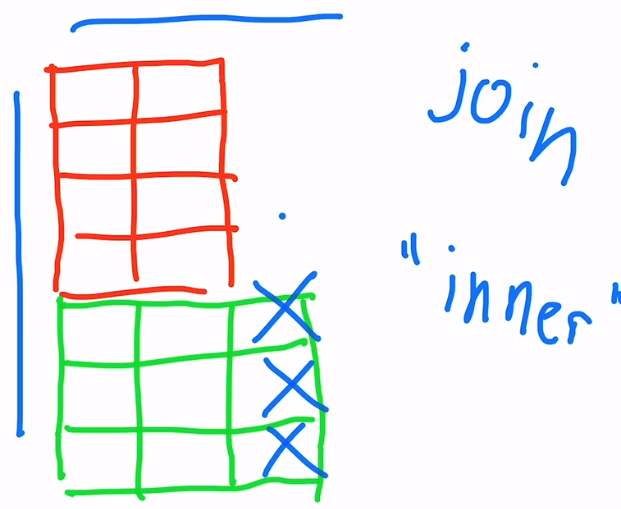

In [ ]:
inner

name image
0   apple     🍏
1    pear     🍐
2  tomato     🍅
3   lemon     🍋
0  tomato     🍅
1  potato     🥔
2  carrot     🥕

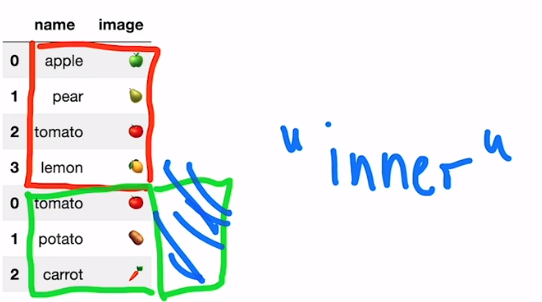

# <b>Join Rows When Concatenating on Columns</b>


In [ ]:
inner = pd.concat([fruits, veggies], axis=1, join='inner')

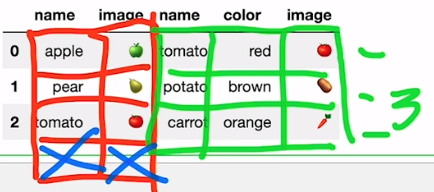

In [ ]:
inner

name image    name   color image
0   apple     🍏  tomato     red     🍅
1    pear     🍐  potato   brown     🥔
2  tomato     🍅  carrot  orange     🥕

# <i>Daugiau informacijos apie pd.concat ir savo laiku galite paziureti taip:

In [ ]:
help(pd.concat) # or looking at pandas documentation

Help on function concat in module pandas.core.reshape.concat:

concat(objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]', axis=0, join='outer', ignore_index: 'bool' = False, keys=None, levels=None, names=None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool' = True) -> 'FrameOrSeriesUnion'
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised.
    a

# <b>Perform an Inner Join Using merge() </b>

In [ ]:
merging = pd.merge(fruits, veggies)
merging

name image color
0  tomato     🍅   red

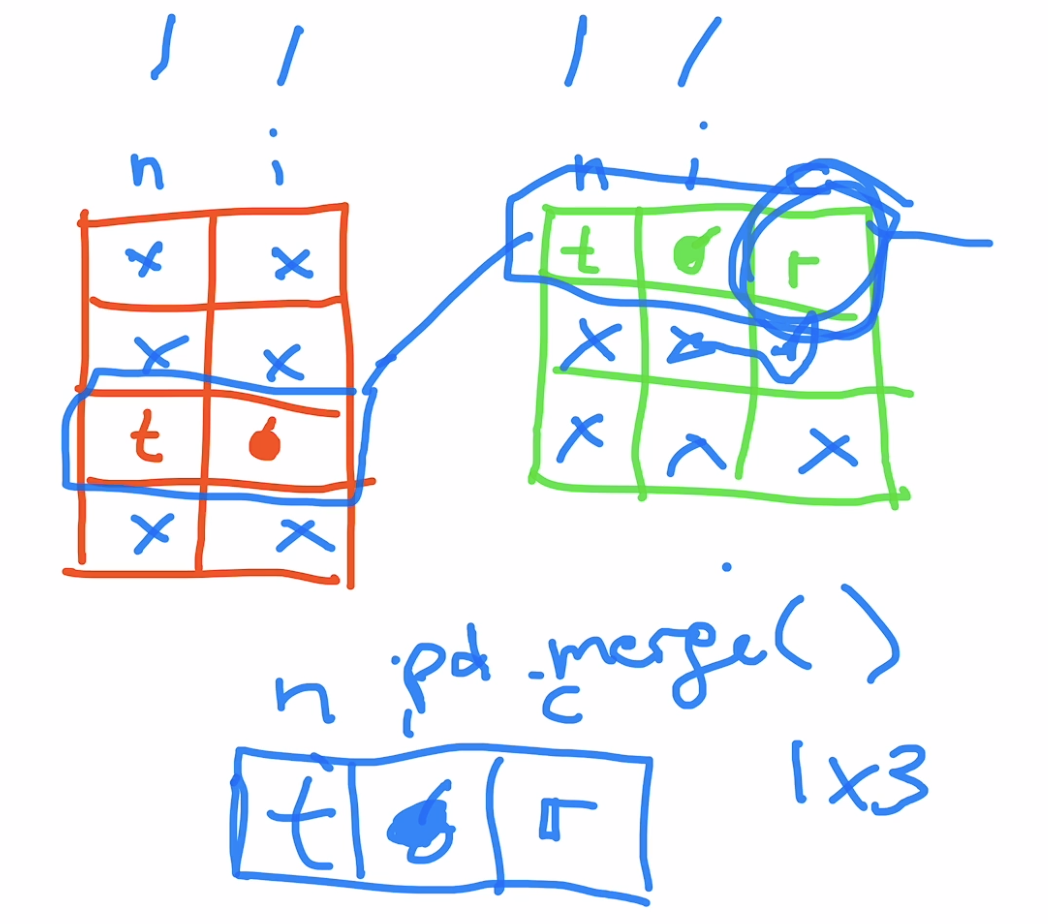

In [ ]:
pd.merge?

Signature:
pd.merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'str' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool' = True,
    indicator: 'bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

Parameters
----------
left : DataFrame
right : DataFrame or named Series
 

In [ ]:
pd.merge(fruits, veggies, how='outer')

name image   color
0   apple     🍏     NaN
1    pear     🍐     NaN
2  tomato     🍅     red
3   lemon     🍋     NaN
4  potato     🥔   brown
5  carrot     🥕  orange

In [ ]:
pd.concat([fruits, veggies])

name image   color
0   apple     🍏     NaN
1    pear     🍐     NaN
2  tomato     🍅     NaN
3   lemon     🍋     NaN
0  tomato     🍅     red
1  potato     🥔   brown
2  carrot     🥕  orange

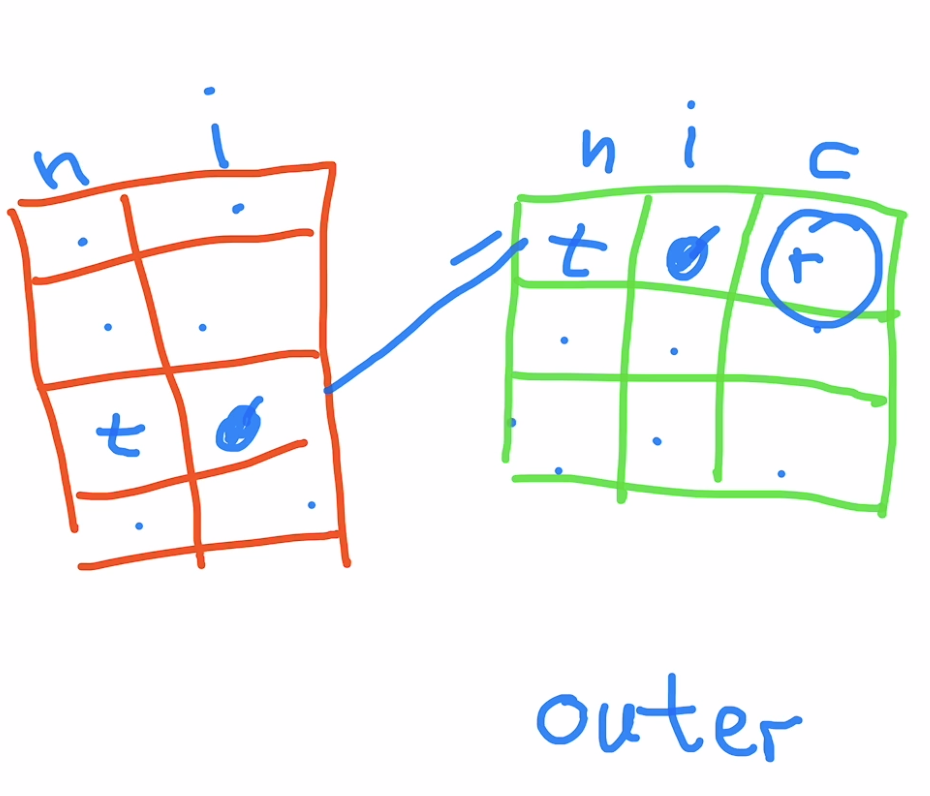

In [ ]:
pd.merge(fruits, veggies, how='outer')

name image   color
0   apple     🍏     NaN
1    pear     🍐     NaN
2  tomato     🍅     red
3   lemon     🍋     NaN
4  potato     🥔   brown
5  carrot     🥕  orange

</i> Visual representation:

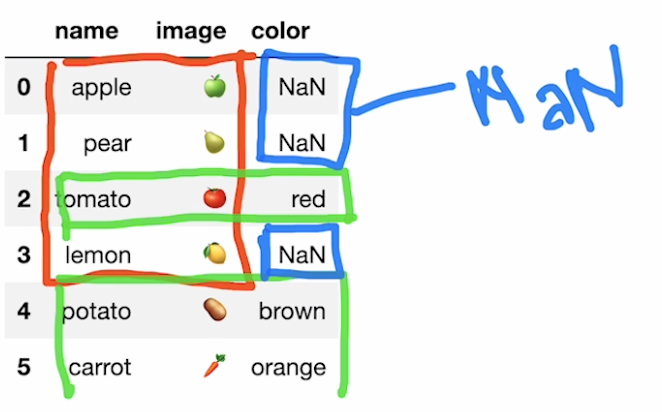

# <b> Understand the Differences Between Left and Right Joins </b>


In [ ]:
pd.merge(fruits, veggies, how='left')

name image color
0   apple     🍏   NaN
1    pear     🍐   NaN
2  tomato     🍅   red
3   lemon     🍋   NaN

In [ ]:
pd.merge(fruits, veggies, how='right')

name image   color
0  tomato     🍅     red
1  potato     🥔   brown
2  carrot     🥕  orange

In [ ]:
fruits['taste'] = ['sweet', 'sweet', 'sour', 'sour']

In [ ]:
fruits

name image  taste
0   apple     🍏  sweet
1    pear     🍐  sweet
2  tomato     🍅   sour
3   lemon     🍋   sour

In [ ]:
pd.merge(fruits, veggies, how='right')

name image taste   color
0  tomato     🍅  sour     red
1  potato     🥔   NaN   brown
2  carrot     🥕   NaN  orange

# <b>Specify the Join Columns Explicitly</b>

In [ ]:
fruits = fruits.drop('taste', axis=1)

In [ ]:
fruits

name image
0   apple     🍏
1    pear     🍐
2  tomato     🍅
3   lemon     🍋

In [ ]:
pd.merge(fruits, veggies)

name image color
0  tomato     🍅   red

In [ ]:
pd.merge(fruits, veggies, on='name')

name image_x color image_y
0  tomato       🍅   red       🍅

In [ ]:
pd.merge(fruits, veggies, on='image')

name_x image  name_y color
0  tomato     🍅  tomato   red

In [ ]:
pd.merge(fruits, veggies, on=['name', 'image'])

name image color
0  tomato     🍅   red

In [ ]:
pd.merge(fruits, veggies, on='color')

KeyError: 'color'

In [ ]:
pd.merge?

Signature:
pd.merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'str' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool' = True,
    indicator: 'bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

Parameters
----------
left : DataFrame
right : DataFrame or named Series
 

# <b>Join DataFrames Using Index Columns

In [ ]:
fruits

name image
0   apple     🍏
1    pear     🍐
2  tomato     🍅
3   lemon     🍋

In [ ]:
veggies

name   color image
0  tomato     red     🍅
1  potato   brown     🥔
2  carrot  orange     🥕

In [ ]:
pd.merge(fruits, veggies, left_index=True, right_index=True)

name_x image_x  name_y   color image_y
0   apple       🍏  tomato     red       🍅
1    pear       🍐  potato   brown       🥔
2  tomato       🍅  carrot  orange       🥕

In [ ]:
couple_of_fruits = {'name': ['apple', 'pear', 'tomato', 'lemon'],
                    'image': ['🍏', '🍐', '🍅', '🍋'],
                    'amount': [1, 3, 0, 1]}

vegetables = {'name': ['tomato', 'potato', 'carrot'],
              'color':['red', 'brown', 'orange'],
              'image': ['🍅', '🥔', '🥕']}

fruits = pd.DataFrame(couple_of_fruits)
veggies = pd.DataFrame(vegetables)      

In [ ]:
fruits

name image  amount
0   apple     🍏       1
1    pear     🍐       3
2  tomato     🍅       0
3   lemon     🍋       1

In [ ]:
veggies

name   color image
0  tomato     red     🍅
1  potato   brown     🥔
2  carrot  orange     🥕

In [ ]:
pd.merge(fruits, veggies, left_on='amount', right_index=True)

name_x image_x  amount  name_y  color image_y
0   apple       🍏       1  potato  brown       🥔
3   lemon       🍋       1  potato  brown       🥔
2  tomato       🍅       0  tomato    red       🍅

# <b>Customize Column Suffixes and Perform a Cross Join</b>

In [ ]:
pd.merge(fruits, veggies, left_on='amount', right_index=True, suffixes=['_f', '_v'])

name_f image_f  amount  name_v  color image_v
0   apple       🍏       1  potato  brown       🥔
3   lemon       🍋       1  potato  brown       🥔
2  tomato       🍅       0  tomato    red       🍅

In [ ]:
pd.merge(fruits, veggies, how='cross')

name_x image_x  amount  name_y   color image_y
0    apple       🍏       1  tomato     red       🍅
1    apple       🍏       1  potato   brown       🥔
2    apple       🍏       1  carrot  orange       🥕
3     pear       🍐       3  tomato     red       🍅
4     pear       🍐       3  potato   brown       🥔
5     pear       🍐       3  carrot  orange       🥕
6   tomato       🍅       0  tomato     red       🍅
7   tomato       🍅       0  potato   brown       🥔
8   tomato       🍅       0  carrot  orange       🥕
9    lemon       🍋       1  tomato     red       🍅
10   lemon       🍋       1  potato   brown       🥔
11   lemon       🍋       1  carrot  orange       🥕

# <b>Some Pecularities

In [ ]:
fruits = pd.concat(
    [fruits, pd.DataFrame([{'name': 'orange', 'image': '🍊', 'amount':10}])],
     ignore_index=True
)

In [ ]:
fruits


name image  amount
0   apple     🍏       1
1    pear     🍐       3
2  tomato     🍅       0
3   lemon     🍋       1
4  orange     🍊      10

In [ ]:
veggies

name   color image
0  tomato     red     🍅
1  potato   brown     🥔
2  carrot  orange     🥕

In [ ]:
pd.merge(fruits, veggies, left_on='name', right_on='color')

name_x image_x  amount  name_y   color image_y
0  orange       🍊      10  carrot  orange       🥕

In [ ]:
pd.merge(fruits, veggies, left_on='image', right_on='name')

Empty DataFrame
Columns: [name_x, image_x, amount, name_y, color, image_y]
Index: []

In [ ]:
merged = pd.merge(fruits, veggies, how='outer')

In [ ]:
merged

name image  amount   color
0   apple     🍏     1.0     NaN
1    pear     🍐     3.0     NaN
2  tomato     🍅     0.0     red
3   lemon     🍋     1.0     NaN
4  orange     🍊    10.0     NaN
5  potato     🥔     NaN   brown
6  carrot     🥕     NaN  orange

In [ ]:
merged.dtypes

name       object
image      object
amount    float64
color      object
dtype: object

In [ ]:
fruits.dtypes

name      object
image     object
amount     int64
dtype: object

# <b> Conclusion

Mes susipažinome su <b>pd.concat()</b> ir <b>pd.merge()</b> funkcionalimais kuomet palietėme key words kaip <b>axis</b> (0, 1, ‘rows‘, ‘colums‘), <b>join</b> ('inner', 'outer'), <b>how</b> ('outer', 'left', 'right'), <b>suffixes()</b>, <b>left_on</b>, <b>rigth_on</b>, keys (mūsų atveju ‘fruits‘ ar ‘veggies‘) ir pasikartojome funkcijas <i>loc()</i>, <i>iloc()</i> ir <i>drop()</i>!

## <b> Time for exercises

## <b>Back to Slides

# <b>Wide and long data formats

In [ ]:
def build_dataframe(periods=100):
    """
    Creates columns with random data.
    """
    import random
    random.seed(10)
    data = {
            'type': random.choices(population=['impressions', 'clicks', 'conversions'], weights=[100, 10, 1], k=periods)
        }
    from datetime import date, timedelta
    from random import choices

    # create some random dates in a test period 
    test_date1, test_date2 = date(2020, 1, 1), date(2020, 2, 1)

    res_dates = [test_date1]

    # loop to get each date till end date
    while test_date1 != test_date2:
        test_date1 += timedelta(days=1)
        res_dates.append(test_date1)

    # random dates
    res = choices(res_dates, k=periods)

    df = pd.DataFrame(data)
    df['date'] = res

    return df


# retrieve the data
long_df = build_dataframe(periods=500)

In [ ]:
long_df

type        date
0    impressions  2020-01-03
1    impressions  2020-01-13
2    impressions  2020-01-03
3    impressions  2020-01-01
4    impressions  2020-01-27
..           ...         ...
495  impressions  2020-01-18
496  impressions  2020-01-29
497  impressions  2020-01-16
498  impressions  2020-01-23
499  impressions  2020-01-09

[500 rows x 2 columns]

In [ ]:
# Step 1: add a count column to able to summarize when grouping
long_df['count']=1
long_df.tail()

type        date  count
495  impressions  2020-01-18      1
496  impressions  2020-01-29      1
497  impressions  2020-01-16      1
498  impressions  2020-01-23      1
499  impressions  2020-01-09      1

In [ ]:
# Step 2: group by date and type and sum
grouped_long_df = long_df.groupby(['date', 'type']).sum().reset_index()
grouped_long_df

date         type  count
0   2020-01-01       clicks      1
1   2020-01-01  impressions     18
2   2020-01-02       clicks      2
3   2020-01-02  impressions     19
4   2020-01-03       clicks      1
5   2020-01-03  conversions      1
6   2020-01-03  impressions     14
7   2020-01-04  impressions      5
8   2020-01-05       clicks      1
9   2020-01-05  impressions      8
10  2020-01-06       clicks      1
11  2020-01-06  conversions      1
12  2020-01-06  impressions     15
13  2020-01-07       clicks      2
14  2020-01-07  impressions      8
15  2020-01-08  conversions      1
16  2020-01-08  impressions     15
17  2020-01-09  impressions     16
18  2020-01-10       clicks      3
19  2020-01-10  impressions     16
20  2020-01-11       clicks      2
21  2020-01-11  impressions     12
22  2020-01-12       clicks      1
23  2020-01-12  impressions     14
24  2020-01-13  impressions     17
25  2020-01-14       clicks      1
26  2020-01-14  impressions     14
27  2020-01-15       clicks      2
28  2020-01-15  impressions      9
29  2020-01-16       clicks      1
30  2020-01-16  impressions     16
31  2020-01-17  impressions     10
32  2020-01-18       clicks      2
33  2020-01-18  impressions     20
34  2020-01-19       clicks      3
35  2020-01-19  conversions      1
36  2020-01-19  impressions     17
37  2020-01-20  impressions     12
38  2020-01-21       clicks      2
39  2020-01-21  impressions     16
40  2020-01-22       clicks      1
41  2020-01-22  conversions      1
42  2020-01-22  impressions     18
43  2020-01-23       clicks      3
44  2020-01-23  impressions     16
45  2020-01-24       clicks      2
46  2020-01-24  impressions     16
47  2020-01-25  impressions     17
48  2020-01-26       clicks      1
49  2020-01-26  impressions     13
50  2020-01-27  conversions      1
51  2020-01-27  impressions     16
52  2020-01-28       clicks      3
53  2020-01-28  impressions     17
54  2020-01-29       clicks      3
55  2020-01-29  impressions     14
56  2020-01-30       clicks      2
57  2020-01-30  impressions     15
58  2020-01-31  impressions      9
59  2020-02-01  impressions     12

<i> <b> columns</b>: Column to use to make new frame’s columns (e.g., ‘type’). </i> <br>
<i> <b>values</b>: Column(s) to use for populating new frame’s values (e.g., ‘count'). </i> <br>
<i> <b>index</b>: Column to use to make new frame’s index (e.g., ‘date’). If None, use the existing index. </i> <br>



In [ ]:
# Step 3: build wide format from long format
wide_df = grouped_long_df.pivot(index='date', columns='type', values='count').reset_index()
wide_df.head()

type        date  clicks  conversions  impressions
0     2020-01-01     1.0          NaN         18.0
1     2020-01-02     2.0          NaN         19.0
2     2020-01-03     1.0          1.0         14.0
3     2020-01-04     NaN          NaN          5.0
4     2020-01-05     1.0          NaN          8.0

In [ ]:
# Step 4: build long format from wide format
new_long_df =pd.melt(wide_df, id_vars=['date'], var_name='name', value_vars=['impressions', 'clicks', 'conversions'], value_name='count', ignore_index=False)
new_long_df

date         name  count
0   2020-01-01  impressions   18.0
1   2020-01-02  impressions   19.0
2   2020-01-03  impressions   14.0
3   2020-01-04  impressions    5.0
4   2020-01-05  impressions    8.0
..         ...          ...    ...
27  2020-01-28  conversions    NaN
28  2020-01-29  conversions    NaN
29  2020-01-30  conversions    NaN
30  2020-01-31  conversions    NaN
31  2020-02-01  conversions    NaN

[96 rows x 3 columns]

<i>    <b>id_vars</b>: Column(s) to use as identifier variables </i> <br>
<i>    <b>value_vars</b>: Column(s) to unpivot. In our example, it would be the list of year/month columns ('impressions', 'clicks', 'conversions') </i> <br>
<i>    <b>var_name</b>: Name to use for the ‘type’ column </i> <br>
<i>    <b>value_name</b> : Name to use for the ‘count’ column </i> <br>
<i>    <b>ignore_index</b>: If ‘True’, original index is ignored. If ‘False’, the original index is retained </i>

# <b> Multilevel Indexing (Hierarchical Indexing)

In [ ]:
# Data
index=[('California', 2000), ('California', 2010),
       ('New York', 2000), ('New York', 2010),
       ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [ ]:
# The Bad Way
pop[('California', 2010):('Texas', 2000)]
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [ ]:
# The Better Way: Pandas MultiIndex

In [ ]:
index = pd.MultiIndex.from_tuples(index)

In [ ]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [ ]:
# The unstack() method will quickly convert a multiply
# indexed Series to a conventionally indexed DataFrame:
pop_df = pop.unstack()
pop_df

2000      2010
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561

In [ ]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# Some methods of MultiIndex Creation


In [ ]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.867510  0.455276
  2  0.422627  0.048960
b 1  0.549009  0.825164
  2  0.183335  0.843790

In [ ]:
data = {('California', 2000): 33000000,
        ('California', 2010): 38000000,
        ('Texas', 2000): 20000000,
        ('Texas', 2010): 25000000,
        ('New York', 2000): 18000000,
        ('New York', 2010): 21000000}
population = pd.Series(data)
population

California  2000    33000000
            2010    38000000
Texas       2000    20000000
            2010    25000000
New York    2000    18000000
            2010    21000000
dtype: int64

# MultiIndex level names

In [ ]:
population.index.names = ['state', 'year']
population

state       year
California  2000    33000000
            2010    38000000
Texas       2000    20000000
            2010    25000000
New York    2000    18000000
            2010    21000000
dtype: int64

In [ ]:
population['California', 2000]

33000000

In [ ]:
#Partial indexing is also available
population.sort_index(level=0, inplace=True)
population.loc['California':'New York']

state       year
California  2000    33000000
            2010    38000000
New York    2000    18000000
            2010    21000000
dtype: int64

In [ ]:
population.sort_index(level=1, inplace=True)
population['California', :]

year
2000    33000000
2010    38000000
dtype: int64

In [ ]:
population[:, 2000]

state
California    33000000
New York      18000000
Texas         20000000
dtype: int64

In [ ]:
population[population > 22000000]

state       year
California  2000    33000000
            2010    38000000
Texas       2010    25000000
dtype: int64

In [ ]:
population[['California', 'Texas']]

state       year
California  2000    33000000
            2010    38000000
Texas       2000    20000000
            2010    25000000
dtype: int64

# Stacking and unstacking indices

In [ ]:
population.unstack(level=0)

state  California  New York     Texas
year                                 
2000     33000000  18000000  20000000
2010     38000000  21000000  25000000

In [ ]:
population.unstack(level=1)

year            2000      2010
state                         
California  33000000  38000000
New York    18000000  21000000
Texas       20000000  25000000

In [ ]:
population.unstack().stack()

state       year
California  2000    33000000
            2010    38000000
New York    2000    18000000
            2010    21000000
Texas       2000    20000000
            2010    25000000
dtype: int64

More here - https://pandas.pydata.org/docs/user_guide/advanced.html

# <b>Time Series

In [ ]:
# Data contains temperature measurements at one hour intervals in Celsius
temp_c = [8.0,  7.1,  6.8,  6.4,  6.0,  5.4,  4.8,  5.0,
           9.1, 12.8, 15.3, 19.1, 21.2, 22.1, 22.4, 23.1,
          21.0, 17.9, 15.5, 14.4, 11.9, 11.0, 10.2,  9.1]

In [ ]:
# df we'll create is going to contain a date time index
df = pd.date_range(start='2022-08-10 00:00:00', periods=24, freq='H')


In [ ]:
type(df)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
temp = pd.DataFrame(data={'temp_c': temp_c}, index=df)

In [ ]:
temp

temp_c
2022-08-10 00:00:00     8.0
2022-08-10 01:00:00     7.1
2022-08-10 02:00:00     6.8
2022-08-10 03:00:00     6.4
2022-08-10 04:00:00     6.0
2022-08-10 05:00:00     5.4
2022-08-10 06:00:00     4.8
2022-08-10 07:00:00     5.0
2022-08-10 08:00:00     9.1
2022-08-10 09:00:00    12.8
2022-08-10 10:00:00    15.3
2022-08-10 11:00:00    19.1
2022-08-10 12:00:00    21.2
2022-08-10 13:00:00    22.1
2022-08-10 14:00:00    22.4
2022-08-10 15:00:00    23.1
2022-08-10 16:00:00    21.0
2022-08-10 17:00:00    17.9
2022-08-10 18:00:00    15.5
2022-08-10 19:00:00    14.4
2022-08-10 20:00:00    11.9
2022-08-10 21:00:00    11.0
2022-08-10 22:00:00    10.2
2022-08-10 23:00:00     9.1

In [ ]:
temp.loc['2022-08-10 05' : '2022-08-10 15']

temp_c
2022-08-10 05:00:00     5.4
2022-08-10 06:00:00     4.8
2022-08-10 07:00:00     5.0
2022-08-10 08:00:00     9.1
2022-08-10 09:00:00    12.8
2022-08-10 10:00:00    15.3
2022-08-10 11:00:00    19.1
2022-08-10 12:00:00    21.2
2022-08-10 13:00:00    22.1
2022-08-10 14:00:00    22.4
2022-08-10 15:00:00    23.1

In [ ]:
new_df = temp.resample(rule='6h').min()
new_df

temp_c
2022-08-10 00:00:00     5.4
2022-08-10 06:00:00     4.8
2022-08-10 12:00:00    17.9
2022-08-10 18:00:00     9.1

In [ ]:
temp.asfreq(freq='4h')

temp_c
2022-08-10 00:00:00     8.0
2022-08-10 04:00:00     6.0
2022-08-10 08:00:00     9.1
2022-08-10 12:00:00    21.2
2022-08-10 16:00:00    21.0
2022-08-10 20:00:00    11.9

In [ ]:
temp

temp_c
2022-08-10 00:00:00     8.0
2022-08-10 01:00:00     7.1
2022-08-10 02:00:00     6.8
2022-08-10 03:00:00     6.4
2022-08-10 04:00:00     6.0
2022-08-10 05:00:00     5.4
2022-08-10 06:00:00     4.8
2022-08-10 07:00:00     5.0
2022-08-10 08:00:00     9.1
2022-08-10 09:00:00    12.8
2022-08-10 10:00:00    15.3
2022-08-10 11:00:00    19.1
2022-08-10 12:00:00    21.2
2022-08-10 13:00:00    22.1
2022-08-10 14:00:00    22.4
2022-08-10 15:00:00    23.1
2022-08-10 16:00:00    21.0
2022-08-10 17:00:00    17.9
2022-08-10 18:00:00    15.5
2022-08-10 19:00:00    14.4
2022-08-10 20:00:00    11.9
2022-08-10 21:00:00    11.0
2022-08-10 22:00:00    10.2
2022-08-10 23:00:00     9.1

In [ ]:
temp.rolling(window=3).mean()

temp_c
2022-08-10 00:00:00        NaN
2022-08-10 01:00:00        NaN
2022-08-10 02:00:00   7.300000
2022-08-10 03:00:00   6.766667
2022-08-10 04:00:00   6.400000
2022-08-10 05:00:00   5.933333
2022-08-10 06:00:00   5.400000
2022-08-10 07:00:00   5.066667
2022-08-10 08:00:00   6.300000
2022-08-10 09:00:00   8.966667
2022-08-10 10:00:00  12.400000
2022-08-10 11:00:00  15.733333
2022-08-10 12:00:00  18.533333
2022-08-10 13:00:00  20.800000
2022-08-10 14:00:00  21.900000
2022-08-10 15:00:00  22.533333
2022-08-10 16:00:00  22.166667
2022-08-10 17:00:00  20.666667
2022-08-10 18:00:00  18.133333
2022-08-10 19:00:00  15.933333
2022-08-10 20:00:00  13.933333
2022-08-10 21:00:00  12.433333
2022-08-10 22:00:00  11.033333
2022-08-10 23:00:00  10.100000

## <b>Plotting Time Series With pandas DataFrames


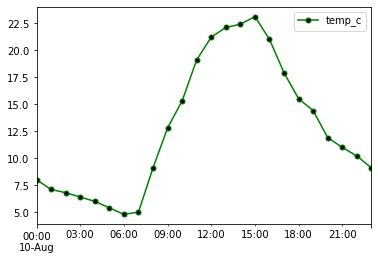

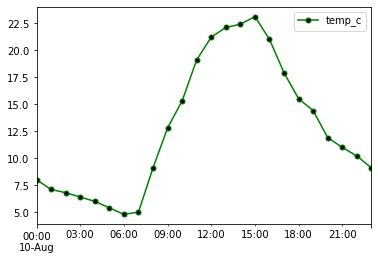

In [ ]:
temp.plot(kind='line', color='g', style='.-', mfc='k', ms=10);
temp.plot.line(color='g', style='.-', mfc='k', ms=10).get_figure().savefig('temperatures.png')

# <b> Cleaning Data

## <b> Renaming Headers

In [ ]:
olympics = pd.read_csv('Data/olympics.csv')
olympics.head()

0         1     2     3     4      5         6     7     8  \
0                NaN  ? Summer  01 !  02 !  03 !  Total  ? Winter  01 !  02 !   
1  Afghanistan (AFG)        13     0     0     2      2         0     0     0   
2      Algeria (ALG)        12     5     2     8     15         3     0     0   
3    Argentina (ARG)        23    18    24    28     70        18     0     0   
4      Armenia (ARM)         5     1     2     9     12         6     0     0   

      9     10       11    12    13    14              15  
0  03 !  Total  ? Games  01 !  02 !  03 !  Combined total  
1     0      0       13     0     0     2               2  
2     0      0       15     5     2     8              15  
3     0      0       41    18    24    28              70  
4     0      0       11     1     2     9              12

In [ ]:
olympics = pd.read_csv('Data/olympics.csv', header=1)
olympics.head()

Unnamed: 0  ? Summer  01 !  02 !  03 !  Total  ? Winter  \
0        Afghanistan (AFG)        13     0     0     2      2         0   
1            Algeria (ALG)        12     5     2     8     15         3   
2          Argentina (ARG)        23    18    24    28     70        18   
3            Armenia (ARM)         5     1     2     9     12         6   
4  Australasia (ANZ) [ANZ]         2     3     4     5     12         0   

   01 !.1  02 !.1  03 !.1  Total.1  ? Games  01 !.2  02 !.2  03 !.2  \
0       0       0       0        0       13       0       0       2   
1       0       0       0        0       15       5       2       8   
2       0       0       0        0       41      18      24      28   
3       0       0       0        0       11       1       2       9   
4       0       0       0        0        2       3       4       5   

   Combined total  
0               2  
1              15  
2              70  
3              12  
4              12

In [ ]:
def read():
    return pd.read_csv('Data/olympics.csv', header=1).rename(columns={
        'Unnamed: 0': 'country',
        '? Summer': 'summer_olympics',
        '01 !': 'summer_golds',
        '02 !': 'summer_silvers',
        '03 !': 'summer_bronzes',
        'Total': 'summer_total',
        '? Winter': 'winter_olympics',
        '01 !.1': 'winter_golds',
        '02 !.1': 'winter_silvers',
        '03 !.1': 'winter_bronzes',
        'Total.1': 'winter_total',
        '? Games': 'total_games',
        '01 !.2': 'total_golds',
        '02 !.2': 'total_silvers',
        '03 !.2': 'total_bronzes',
        'Combined total': 'combined_total'
    })

olympics = read()


In [ ]:
olympics.head()

country  summer_olympics  summer_golds  summer_silvers  \
0        Afghanistan (AFG)               13             0               0   
1            Algeria (ALG)               12             5               2   
2          Argentina (ARG)               23            18              24   
3            Armenia (ARM)                5             1               2   
4  Australasia (ANZ) [ANZ]                2             3               4   

   summer_bronzes  summer_total  winter_olympics  winter_golds  \
0               2             2                0             0   
1               8            15                3             0   
2              28            70               18             0   
3               9            12                6             0   
4               5            12                0             0   

   winter_silvers  winter_bronzes  winter_total  total_games  total_golds  \
0               0               0             0           13            0   
1               0               0             0           15            5   
2               0               0             0           41           18   
3               0               0             0           11            1   
4               0               0             0            2            3   

   total_silvers  total_bronzes  combined_total  
0              0              2               2  
1              2              8              15  
2             24             28              70  
3              2              9              12  
4              4              5              12

# <b> END OF LECTURE 2 SESSION 1 ON ADVANCED PANDAS </b>